In [2]:
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.rms
import matplotlib.pyplot as plt
import os 
import seaborn as sns

In [3]:
ligands_all = np.arange(2, 17, 1)
ligands = np.delete(ligands_all, [10, 12, 13])

In [4]:
def get_rmsd(ligand_array: np.ndarray, stage: str) -> tuple: 
    """
    loop over ligands and get rmsds over trajectory
    """
    times = []
    rmsds = []
    for i in range(len(ligand_array)):
        path = f"../outputs/SOMD/lig_h_1~lig_h_{ligand_array[i]}/{stage}/lambda_1.0000/"
        print(f"looking at {path}")
        trajectory_filename = ""
        if os.path.exists(path+"traj000000002.dcd"):
            trajectory_filename = path+"traj000000002.dcd"
        else:
            trajectory_filename = path+"traj000000001.dcd"

        frames = []
        with mda.lib.formats.libdcd.DCDFile(trajectory_filename) as trajectory:
            for frame in trajectory:
                frames.append(frame)
                first_frame = frames[0].xyz

        universe = mda.Universe(path+"somd.prm7", trajectory_filename, topology_format="PARM7")
        reference_universe = mda.Universe(path+"somd.prm7", first_frame, topology_format="PARM7")

        ligand = universe.select_atoms("resname LIG")
        reference = reference_universe.select_atoms("resname LIG")

        rmsd = mda.analysis.rms.RMSD(ligand, reference)
        rmsd.run()

        rmsd_result = rmsd.results.rmsd.T

        time = rmsd_result[1]
        rmsd_values = rmsd_result[2]

        times.append(time)
        rmsds.append(rmsd_values)

        # rmsd_dictionary["time"].append(times)
        # rmsd_dictionary["rmsd"].append(rmsds)

        fig = plt.figure(figsize=(8, 8))
        sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2.)
        ax = fig.add_subplot(111)
        ax.plot(time, rmsd_values, "k-" #, label=f"{stage} ligand {ligand_array[i]}"
        )
        sns.despine()
        # ax.legend()
        ax.set_xlabel("time (ps)")
        ax.set_ylabel(r"RMSD ($\AA$)")
        plt.savefig(f"../../plots/rmsd/{stage}/rmsd_lig_{ligand_array[i]}.pdf")

    return times, rmsds


looking at ../outputs/SOMD/lig_h_1~lig_h_2/free/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_3/free/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_4/free/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_5/free/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_6/free/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_7/free/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_8/free/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_9/free/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_10/free/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_11/free/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_13/free/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_16/free/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_2/bound/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_3/bound/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_4/bound/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_5/bound

/tmp/ipykernel_484393/2409958878.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 8))


looking at ../outputs/SOMD/lig_h_1~lig_h_11/bound/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_13/bound/lambda_1.0000/
looking at ../outputs/SOMD/lig_h_1~lig_h_16/bound/lambda_1.0000/


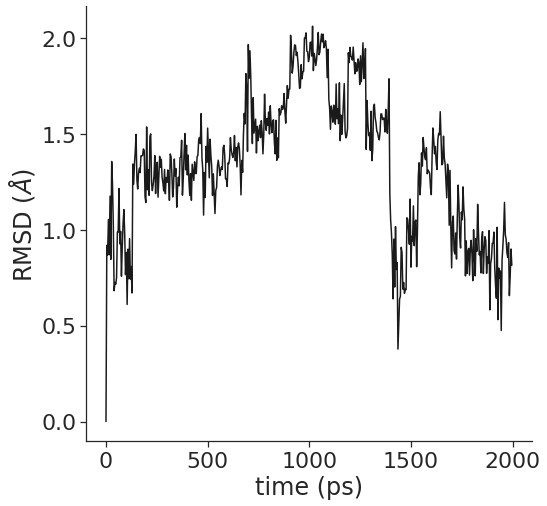

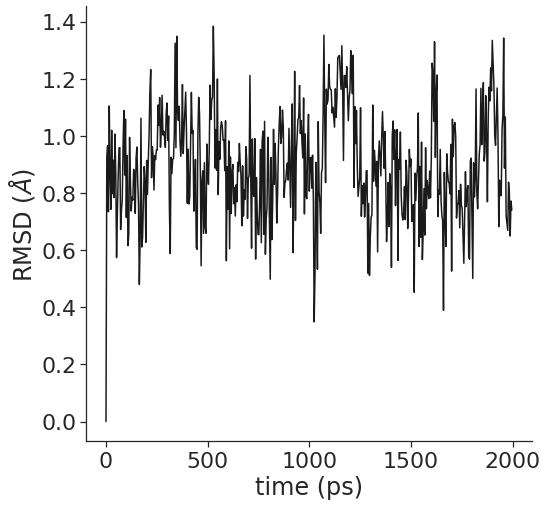

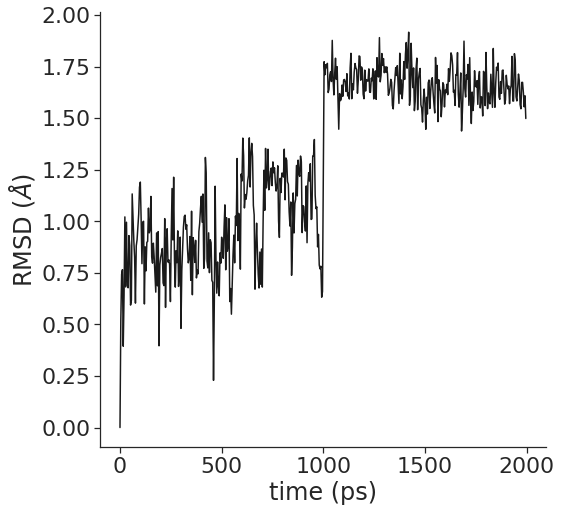

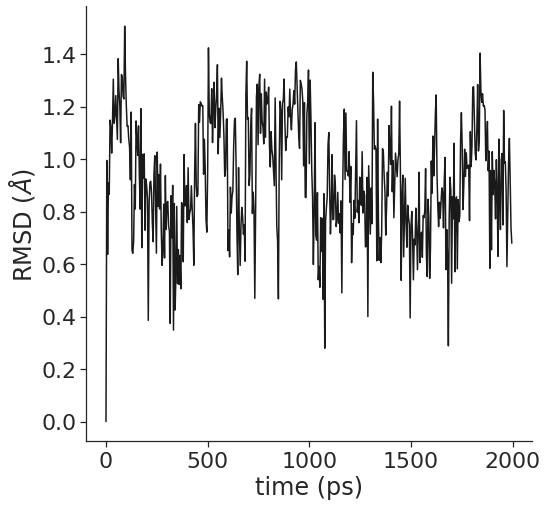

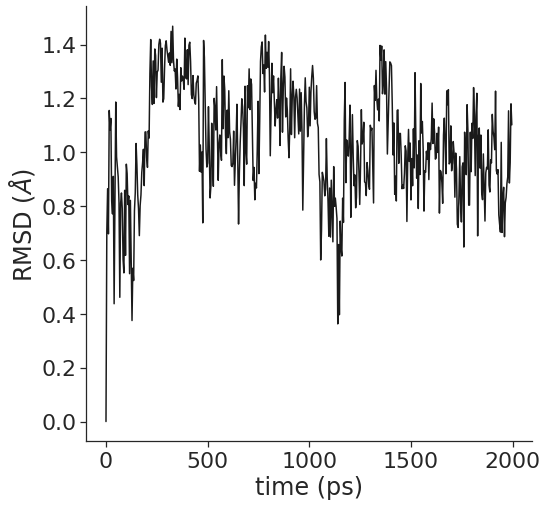

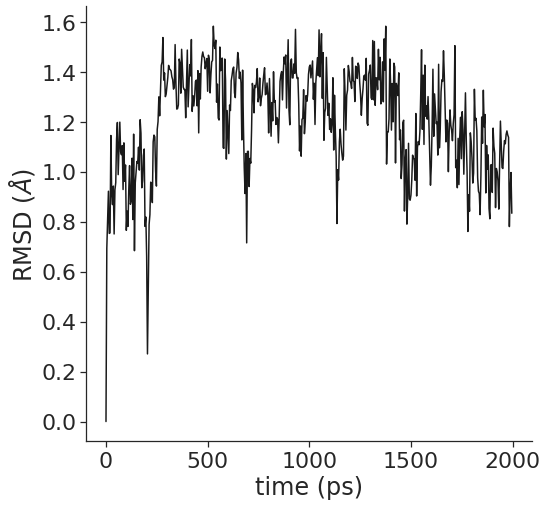

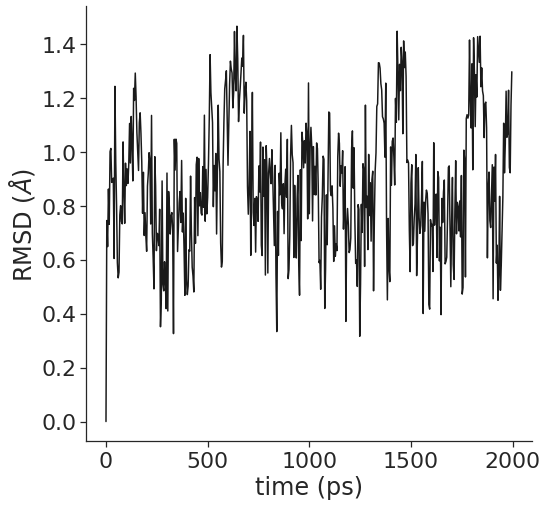

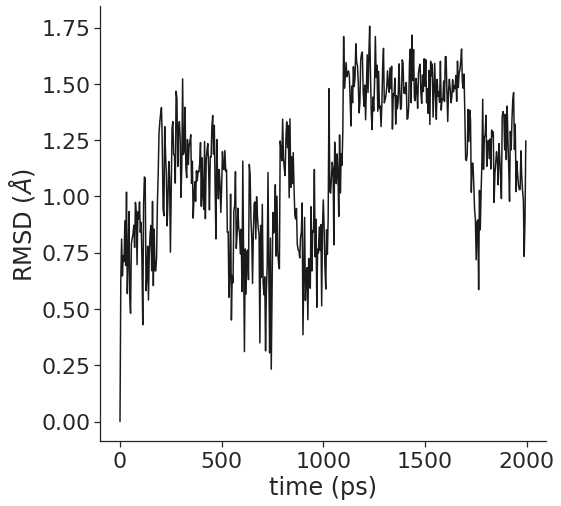

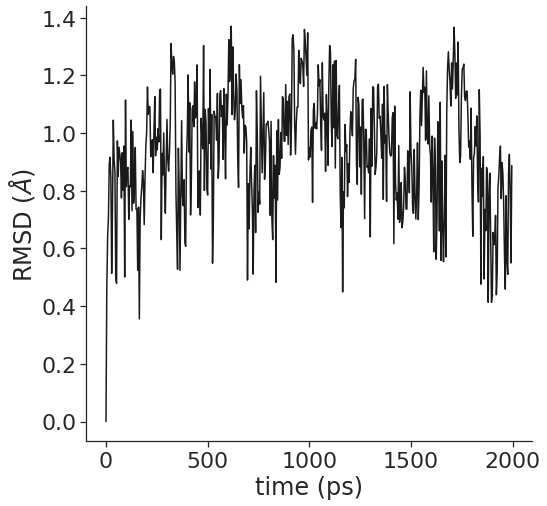

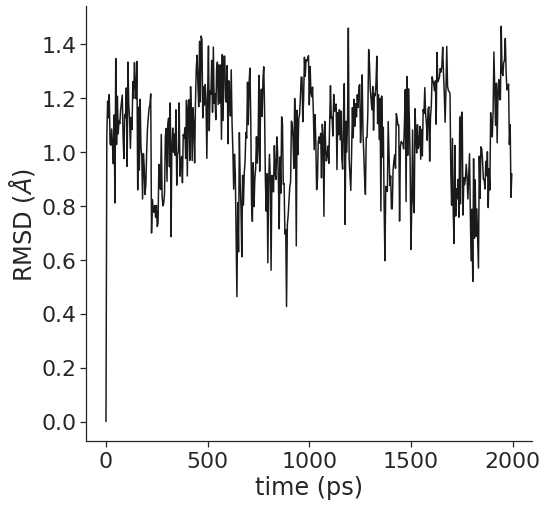

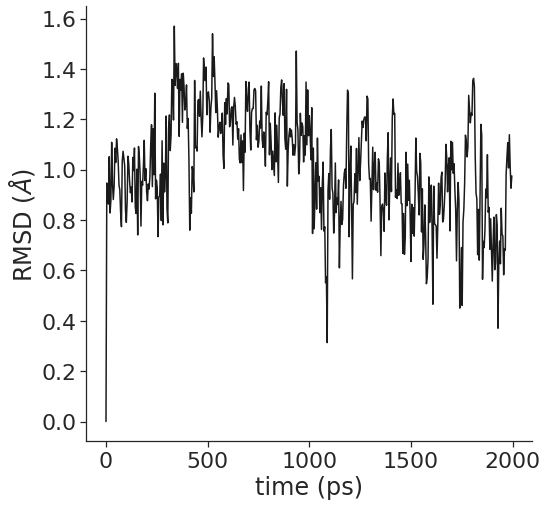

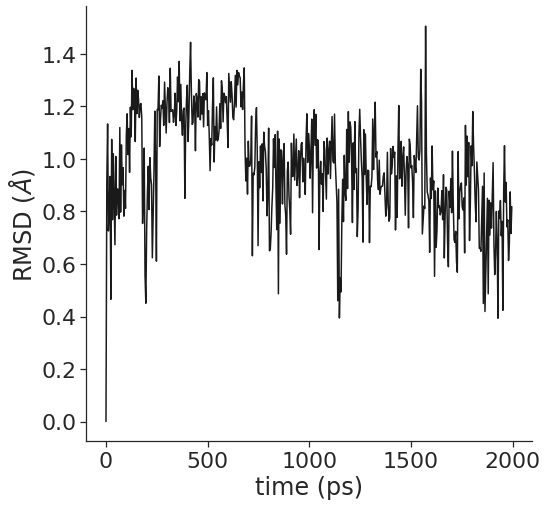

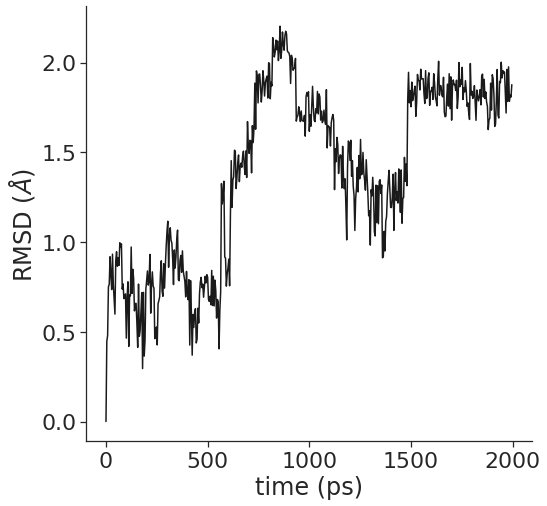

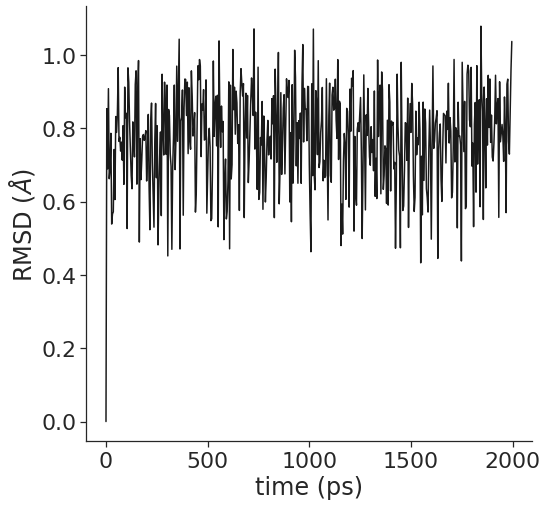

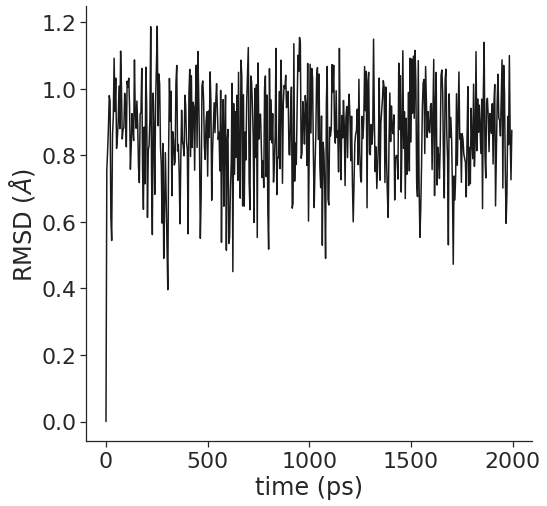

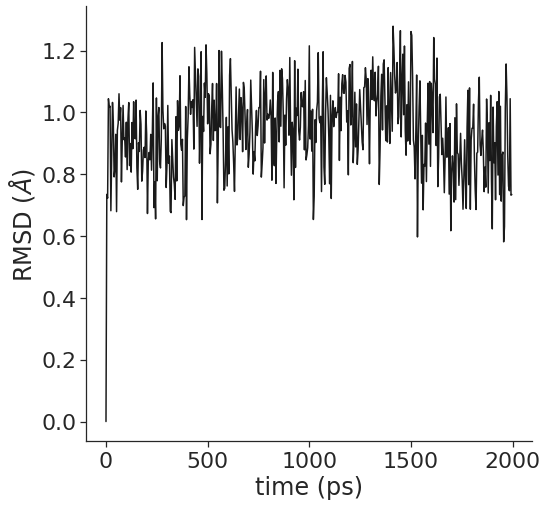

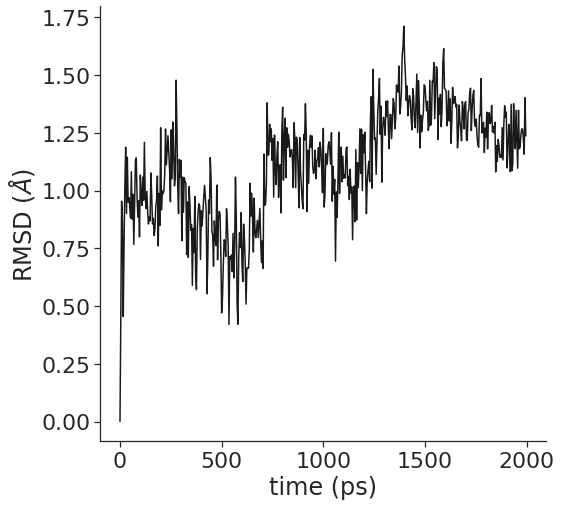

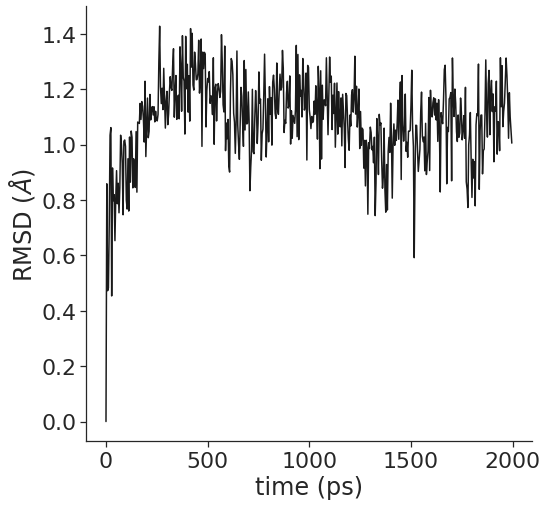

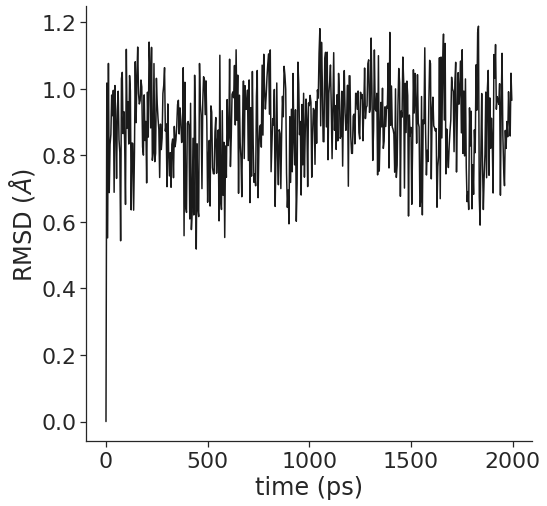

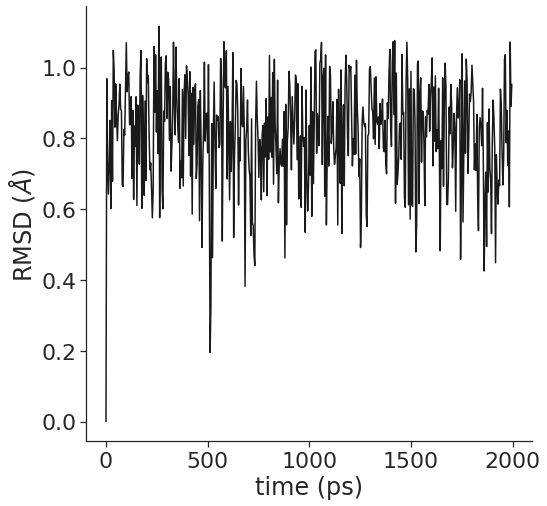

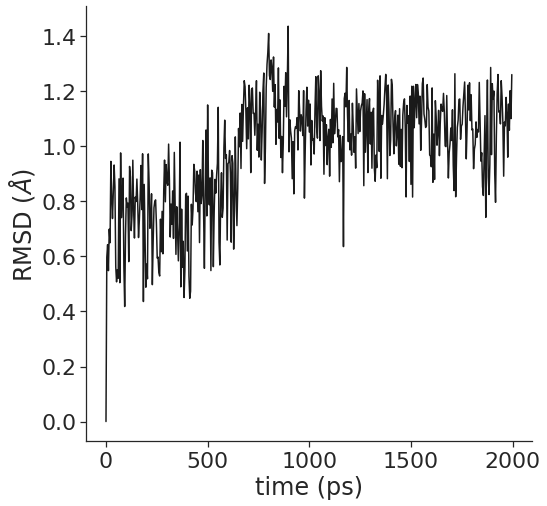

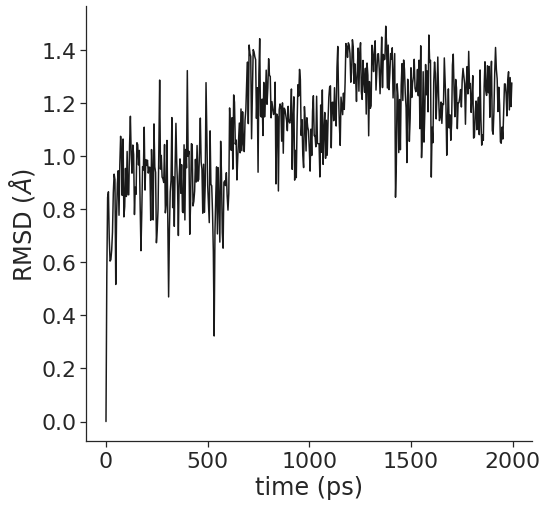

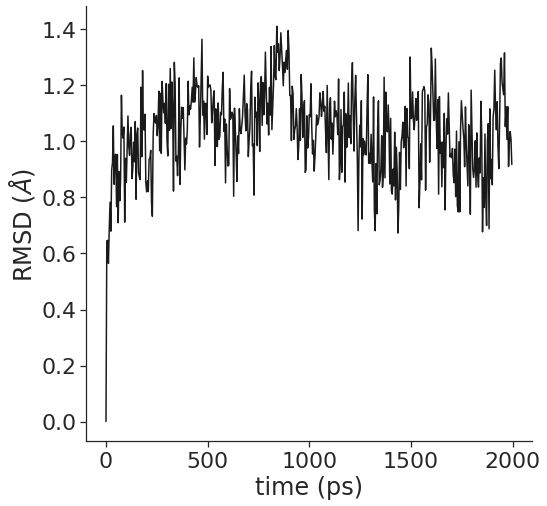

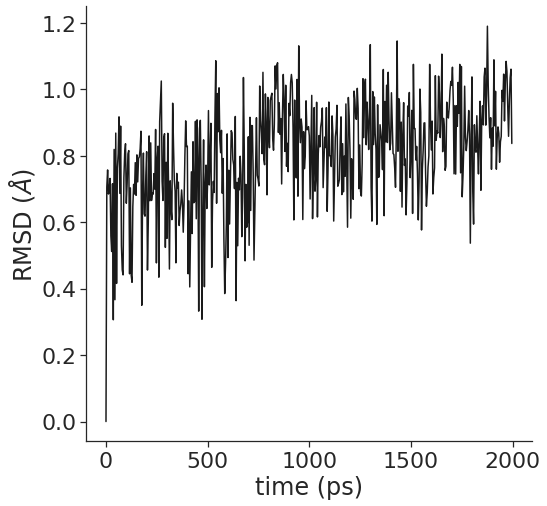

In [5]:
free_rmsds = get_rmsd(ligands, "free")[1]
bound_rmsds = get_rmsd(ligands, "bound")[1]

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5]
[ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5]


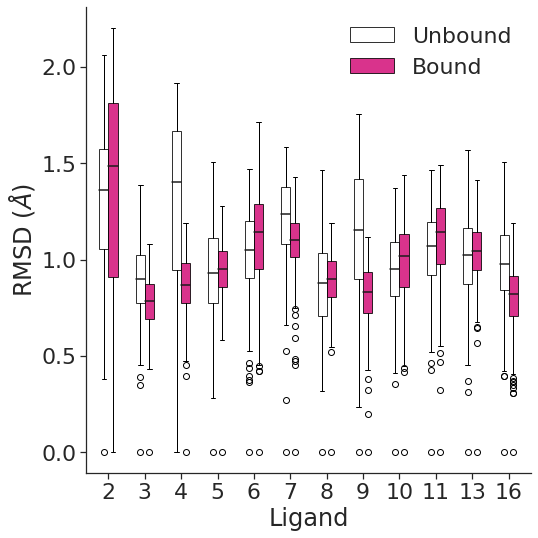

In [6]:
fig = plt.figure(figsize=(8, 8))
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2.)

median_line_properties = dict(linestyle='-', linewidth=1.5, color="k")
box_properties = dict(alpha=0.8)

xtick_positions = np.arange(1, len(ligands) + 1, 1)
print(xtick_positions - 0.5)
print(xtick_positions + 0.5)

free_box = plt.boxplot(free_rmsds, boxprops=box_properties, patch_artist=True, medianprops=median_line_properties, positions=xtick_positions - 0.25/2, widths=0.25)
bound_box = plt.boxplot(bound_rmsds, boxprops=box_properties, patch_artist=True, medianprops=median_line_properties, positions=xtick_positions + 0.25/2, widths=0.25)
colours = ["#F9A800", "#0099AB"]
rgba_colours = [(1, 1, 1),
                (208/255, 0/255, 111/255)]

for patch in free_box["boxes"]:
    patch.set_facecolor(rgba_colours[0])
for patch in bound_box["boxes"]:
    patch.set_facecolor(rgba_colours[1])
plt.xticks(ticks=xtick_positions, labels=ligands)
plt.legend(handles=[free_box["boxes"][0], bound_box["boxes"][0]], labels=["Unbound", "Bound"], frameon=False)
# ax[1].set_xticks(ticks=xtick_positions, labels=ligands, fontsize=12)
plt.xlabel("Ligand")
plt.ylabel(f"RMSD ($\AA$)")
sns.despine()
fig.tight_layout()
fig.subplots_adjust(wspace=0.05)
plt.savefig(f"../../plots/rmsd/box_plot_rmsd_comparison.pdf")
